# <center> LAB 9 - Gale-Shapley and Irving Algorithms </center>
<center>Harold Alfredo Díaz Ortiz</center>

# Punto 2

Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from collections import Counter
from random import randint
from copy import copy

Populating the interactive namespace from numpy and matplotlib


In [2]:
def some_outputs(n, s):
    sorted_s = list(sort(s))
    s_list = []
    queue = []
    queue.append(s) 
    s_list.append(s)

    while queue and len(s_list) < 6*n:
        s = queue.pop(0) 
        if s != sorted_s:
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if (d != s) and not(d in s_list):
                    queue.append(d)
                    s_list.append(d)
                    if len(s_list) >= 6*n:
                      break
    return s_list

In [3]:
def women_proposals(n, index, women_dict):
  permutations = some_outputs(n, list(range(n, 0, -1)))
  for i in range(n, 0, -1):
    if len(permutations)-1 <= 1:
      permutations = some_outputs(n, list(range(n, 0, -1)))
    rand_num = random.randint(1, len(permutations)-1)
    name = "M" + str(n-i+1)
    women_dict[name] = permutations[rand_num]
    index.append("W"+str(n-i+1))
    permutations = some_outputs(n, permutations[rand_num])
  return women_dict, index

In [4]:
def men_proposals(n, index, men_dict):
  permutations = some_outputs(n, list(range(n, 0, -1)))
  for i in range(n, 0, -1):
    if len(permutations)-1 <= 1:
      permutations = some_outputs(n, list(range(n, 0, -1)))
    rand_num = random.randint(1, len(permutations)-1)
    name = "M" + str(n-i+1)
    men_dict[name] = permutations[rand_num]
    index.append("W"+str(n-i+1))
    permutations = some_outputs(n, permutations[rand_num])
  return men_dict, index

In [5]:
def fill_dataframe(dictionary, index):
  gender = pd.DataFrame(dictionary)
  gender.index = index
  return gender.transpose()

In [6]:
def gale_shapley(waiting_list, man_list, women_available, man_df, women_df, proposals):
  # variable to count number of iterations
  count = 0
  # while not all men have pairs
  while len(waiting_list)<len(man_list):
    # man makes proposals
    for man in man_list:
        if man not in waiting_list:
            # each man make proposal to the top women from it's list
            women = women_available[man]
            best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
            proposals[(man, best_choice)] = (man_df.loc[man][best_choice], women_df.loc[man][best_choice])

    # if women have more than one proposals 
    # she will choose the best option
    overlays = Counter([key[1] for key in proposals.keys()])
    # cycle to choose the best options
    for women in overlays.keys():
        if overlays[women]>1:
            # pairs to drop from proposals
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                    if women in pair}.items(), 
                   key=lambda x: x[1][1]
                  )[1:]
            # if man was rejected by woman
            # there is no pint for him to make proposal 
            # second time to the same woman
            for p_to_drop in pairs_to_drop:
                del proposals[p_to_drop[0]]
                _women = copy(women_available[p_to_drop[0][0]])
                _women.remove(p_to_drop[0][1])
                women_available[p_to_drop[0][0]] = _women
    # man who successfully created pairs must be added to the waiting list 
    waiting_list = [man[0] for man in proposals.keys()]
    # update counter
    count+=1

  return count, proposals

In [7]:
def run(n, times):
  count_reg = []
  for i in range(times):
    women_dict, women_index = women_proposals(n, [], {})
    men_dict, men_index = men_proposals(n, [], {})
    man_list, women_list = men_dict.keys(), women_index
    man_df = fill_dataframe(men_dict, men_index)
    women_df = fill_dataframe(women_dict, women_index)
    # dict to control which women each man can make proposals
    women_available = {man:women_list for man in man_list}
    # waiting list of men that were able to create pair on each iteration
    waiting_list = []
    # dict to store created pairs
    proposals = {}

    count, proposals = gale_shapley(waiting_list, man_list, women_available, man_df, women_df, proposals)
    count_reg.append(count)
  return count_reg

## Para $n=4$

In [8]:
n = 4
count_reg = run(n, 100)
print(count_reg)

[4, 4, 5, 4, 4, 5, 3, 5, 4, 4, 3, 5, 3, 3, 3, 1, 2, 4, 5, 1, 1, 3, 3, 2, 6, 3, 3, 3, 2, 4, 2, 2, 2, 4, 3, 2, 5, 1, 1, 3, 3, 1, 2, 4, 5, 2, 3, 2, 4, 1, 3, 1, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 1, 2, 4, 4, 2, 4, 2, 3, 2, 5, 3, 2, 4, 3, 3, 3, 4, 3, 2, 3, 2, 4, 4, 2, 4, 3, 6, 3, 2, 4, 3, 3, 5, 3, 1, 2, 4]


In [9]:
minimum = min(count_reg)
print("The minimum number of iterations in this simulation is:", minimum)

The minimum number of iterations in this simulation is: 1


In [10]:
maximum = max(count_reg)
print("The maximum number of iterations in this simulation is:", maximum)

The maximum number of iterations in this simulation is: 6


In [11]:
average = sum(count_reg)/len(count_reg)
print("The average number of iterations in this simulation is:", average)

The average number of iterations in this simulation is: 2.97


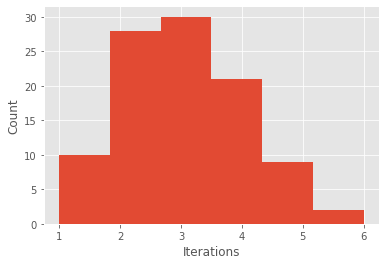

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.xlabel("Iterations") 
plt.ylabel("Count")
plt.hist(count_reg, maximum-minimum+1)
plt.show()

Para $n=40$

In [13]:
n = 40
count_reg = run(n, 100)
print(count_reg)

[65, 67, 51, 182, 99, 51, 209, 65, 37, 68, 44, 52, 85, 34, 207, 74, 92, 51, 80, 60, 29, 40, 81, 74, 88, 38, 95, 58, 184, 60, 93, 82, 157, 37, 163, 126, 54, 164, 44, 35, 137, 21, 29, 49, 61, 59, 79, 74, 183, 121, 91, 41, 64, 35, 59, 107, 33, 96, 52, 57, 57, 18, 28, 65, 121, 164, 199, 66, 123, 98, 56, 192, 131, 80, 104, 106, 101, 127, 62, 41, 97, 35, 56, 149, 28, 78, 125, 93, 71, 111, 89, 45, 75, 58, 24, 95, 43, 52, 117, 59]


In [14]:
minimum = min(count_reg)
print("The minimum number of iterations in this simulation is:", minimum)

The minimum number of iterations in this simulation is: 18


In [15]:
maximum = max(count_reg)
print("The maximum number of iterations in this simulation is:", maximum)

The maximum number of iterations in this simulation is: 209


In [16]:
average = sum(count_reg)/len(count_reg)
print("The average number of iterations in this simulation is:", average)

The average number of iterations in this simulation is: 82.62


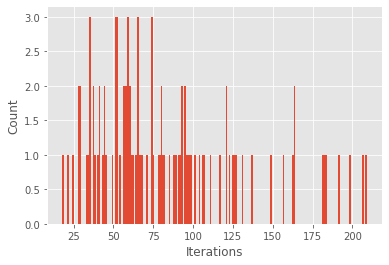

In [17]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.xlabel("Iterations") 
plt.ylabel("Count")
plt.hist(count_reg, maximum-minimum+1)
plt.show()